# Plotting tiles

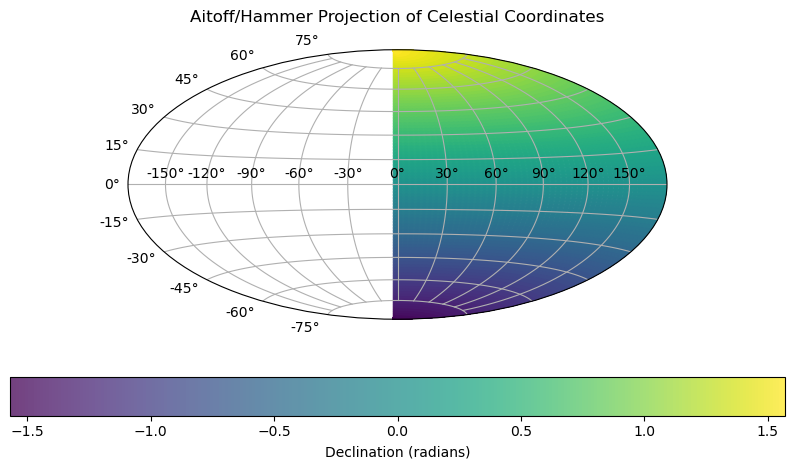

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Sample celestial coordinates (Right Ascension in hours, Declination in degrees)
ra_hours = np.linspace(0, 24, 100)  # RA from 0h to 24h
dec_degrees = np.linspace(-90, 90, 100)  # Dec from -90° to +90°

# Convert RA to degrees and then to radians
ra_radians = np.deg2rad(ra_hours * 15)  # 1 hour = 15 degrees
# Convert Dec to radians
dec_radians = np.deg2rad(dec_degrees)

# Create a meshgrid for the projection
RA, DEC = np.meshgrid(ra_radians, dec_radians)

# Plotting
plt.figure(figsize=(10, 5))
ax = plt.subplot(111, projection='hammer')

# Scatter plot
sc = ax.scatter(RA, DEC, c=DEC, cmap='viridis', alpha=0.75)

# Colorbar
plt.colorbar(sc, orientation='horizontal', label='Declination (radians)')

# Labels and grid
ax.set_title('Aitoff/Hammer Projection of Celestial Coordinates', pad=20)
ax.grid(True)

# Show plot
plt.show()

# Instructions
# You can replace the RA and Dec arrays with actual star data if you have it!
# Just make sure to convert RA to radians by multiplying by 15 and then np.deg2rad().
# Let me know if you want to customize it in any way!


/var/folders/lq/7_q5kjhn1pzgzvpl0fk8y5mc0000gp/T/ipykernel_18507/3868954377.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


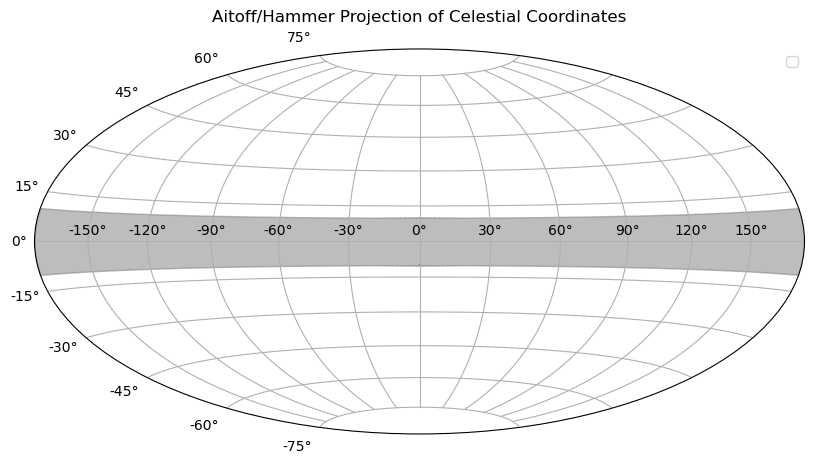

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Sample celestial coordinates (Right Ascension in hours, Declination in degrees)
ra_hours = np.linspace(0, 24, 100)  # RA from 0h to 24h
dec_degrees = np.linspace(-90, 90, 100)  # Dec from -90° to +90°

# Convert RA to degrees and then to radians
ra_radians = np.deg2rad(ra_hours * 15)  # 1 hour = 15 degrees
# Convert Dec to radians
dec_radians = np.deg2rad(dec_degrees)

# Create a meshgrid for the projection
RA, DEC = np.meshgrid(ra_radians, dec_radians)

# Define the Milky Way band as a shaded region
def milky_way_band(ax):
    galactic_latitude_range = 10  # Approximate width of the Milky Way in degrees
    dec_milky_way_upper = np.linspace(-galactic_latitude_range, galactic_latitude_range, 100)
    ra_milky_way = np.linspace(-np.pi, np.pi, 200)  # Cover full RA range
    
    for dec_offset in [-1, 1]:  # Cover both upper and lower bands
        DEC_MW = np.deg2rad(dec_milky_way_upper * dec_offset)
        RA_MW = np.tile(ra_milky_way, (DEC_MW.shape[0], 1))
        ax.fill_between(ra_milky_way, np.min(DEC_MW), np.max(DEC_MW), color='gray', alpha=0.3)

# Plotting
plt.figure(figsize=(10, 5))
ax = plt.subplot(111, projection='hammer')

# Scatter plot
# sc = ax.scatter(RA, DEC, c=DEC, cmap='viridis', alpha=0.75)

# Shade Milky Way region
milky_way_band(ax)

# Colorbar
# plt.colorbar(sc, orientation='horizontal', label='Declination (radians)')

# Labels and grid
ax.set_title('Aitoff/Hammer Projection of Celestial Coordinates', pad=20)
ax.grid(True)
ax.legend()

# Show plot
plt.show()

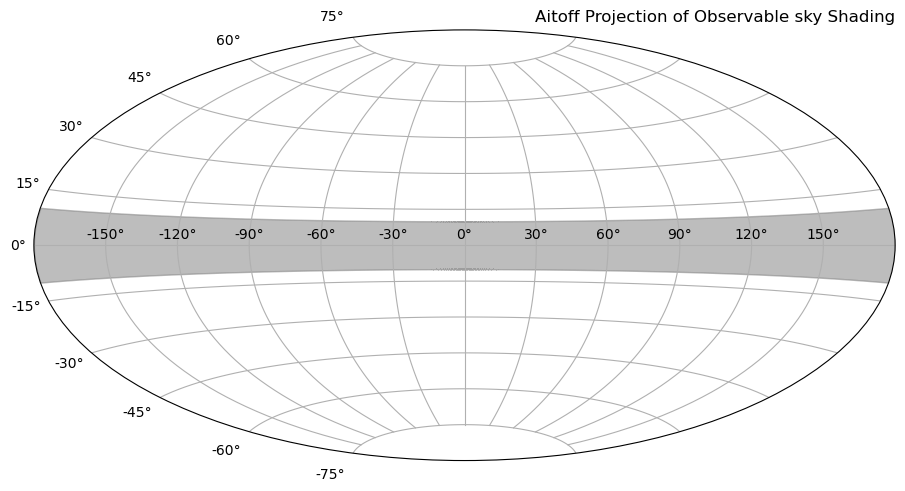

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Create Milky Way shadow
def milky_way_band(ax):
    galactic_latitude_range = 10  # Approximate width of the Milky Way in degrees
    dec_milky_way_upper = np.linspace(-galactic_latitude_range, galactic_latitude_range, 100)
    ra_milky_way = np.linspace(-np.pi, np.pi, 200)  # Cover full RA range
    
    for dec_offset in [-1, 1]:  # Cover both upper and lower bands
        DEC_MW = np.deg2rad(dec_milky_way_upper * dec_offset)
        RA_MW = np.tile(ra_milky_way, (DEC_MW.shape[0], 1))
        ax.fill_between(ra_milky_way, np.min(DEC_MW), np.max(DEC_MW), color='gray', alpha=0.3)


# Plotting
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='aitoff')

milky_way_band(ax) # plot milky way shadowed band

# Customization
plt.title('Aitoff Projection of Observable sky Shading', loc='right')
ax.grid(True)

plt.tight_layout()
plt.show()

### Advantages of SSO for X-ray and Gamma-ray Observations:
1. Consistent Illumination Conditions – The orbit ensures that the spacecraft experiences nearly constant lighting conditions, which helps with thermal control and power management (especially for solar-powered missions).
2. Regular Earth Occultation for Background Calibration – In an SSO, the telescope will periodically pass behind the Earth, providing a natural opportunity to measure the instrumental background and improve data calibration.
3. Good Earth Communication – Being in a low Earth orbit (LEO), an SSO allows for frequent communication with ground stations.

### Challenges of SSO for X-ray and Gamma-ray Observations:
1. Higher Background Radiation – An SSO is typically a low-altitude orbit (500–900 km), meaning the telescope will frequently pass through the South Atlantic Anomaly (SAA), where increased cosmic ray and trapped particle radiation can interfere with sensitive detectors.
2. Limited Sky Coverage – LEO missions can have limited continuous sky visibility due to the Earth blocking part of the view. This is less ideal compared to a high-altitude orbit like Lagrange points (L1/L2) or a highly elliptical orbit.
3. Atmospheric Scattering & Contamination – At lower altitudes, X-ray and gamma-ray instruments may experience more background noise from atmospheric interactions.

### Alternative Orbits to Consider:
1. Highly Elliptical Orbit (HEO) (e.g., Molniya or TESS-style orbits) – Offers long observing times with less Earth occultation and lower background noise.
2. L2 Orbit (Second Lagrange Point) – A popular choice for space telescopes (like JWST) to minimize interference from Earth and maximize deep-space observations.
3. Equatorial Low Earth Orbit (LEO) – If avoiding SAA interference is crucial, an equatorial orbit (e.g., NASA's NuSTAR mission) can be preferable.

### Conclusion:
A sun-synchronous orbit can work for an X-ray or gamma-ray telescope if designed with proper shielding and background calibration methods. However, if minimizing high-energy background noise is a priority, a high-altitude or deep-space orbit would likely be a better option.